<a href="https://colab.research.google.com/github/jpcampos04/Sprint15_project/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`.
El número de pedidos está en la columna `num_orders`.

## Preparación

In [ ]:
# Importa librearías
import pandas as pd
import numpy as np
import time

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

In [ ]:
# Descarga el conjunto de datos
data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])

In [ ]:
# Ordena el índice
data.sort_index(inplace=True)

In [ ]:
# Visualiza la información del Dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


In [ ]:
# Muestra el inicio y final del Dataset
print(data.head(5))
print(data.tail(5))

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
                     num_orders
datetime                       
2018-08-31 23:10:00          32
2018-08-31 23:20:00          24
2018-08-31 23:30:00          27
2018-08-31 23:40:00          39
2018-08-31 23:50:00          53


<AxesSubplot:xlabel='datetime'>

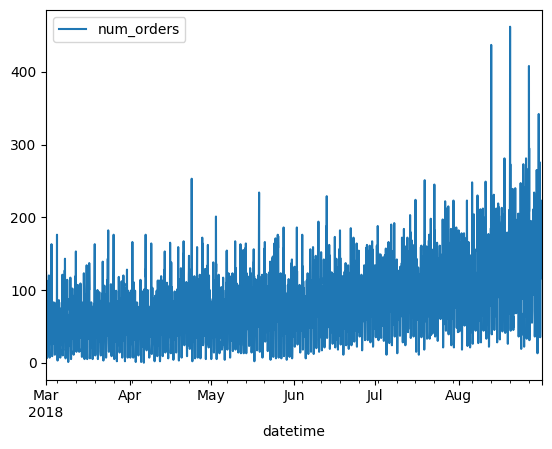

In [ ]:
# Remuestrea el Dataset
data = data['2018-01':'2018-08'].resample('H').sum()
data.plot()

In [ ]:
# Define la función de creación de características
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year # Extrae el año
    data['month'] = data.index.month # Extrae el mes
    data['day'] = data.index.day # Extrae el día
    data['day'] = data.index.dayofweek # Extrae el día de la semana
    data['hour'] = data.index.hour # Extrae la hora

    # Crea columnas de desfase
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    # Calcúla la media móvil
    data['rolling_mean'] = (
        data['num_orders'].shift().rolling(rolling_mean_size).mean()
    )

In [ ]:
# Crea las características respecto a la fecha
# Crea 1 columna +1 de desfase entre periodos
make_features(data, 1, 6)
print(data.head())

                     num_orders  year  month  day  hour  lag_1  rolling_mean
datetime                                                                    
2018-03-01 00:00:00         124  2018      3    3     0    NaN           NaN
2018-03-01 01:00:00          85  2018      3    3     1  124.0           NaN
2018-03-01 02:00:00          71  2018      3    3     2   85.0           NaN
2018-03-01 03:00:00          66  2018      3    3     3   71.0           NaN
2018-03-01 04:00:00          43  2018      3    3     4   66.0           NaN


In [ ]:
# Rellena los datos nulos
data[['lag_1', 'rolling_mean']] = data[['lag_1', 'rolling_mean']].fillna(value='0')

<AxesSubplot:xlabel='datetime'>

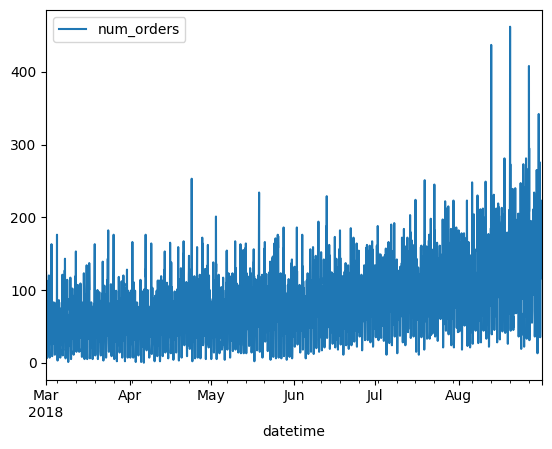

In [ ]:
# Gráfica las variables seleccionadas
data[['num_orders', 'rolling_mean']].plot()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - Preparación clara: imports adecuados, carga con índice temporal ordenado, exploración inicial y remuestreo por hora completados; además, las primeras características quedaron listas para avanzar con el modelado. Buen ritmo.
</div>


## Análisis

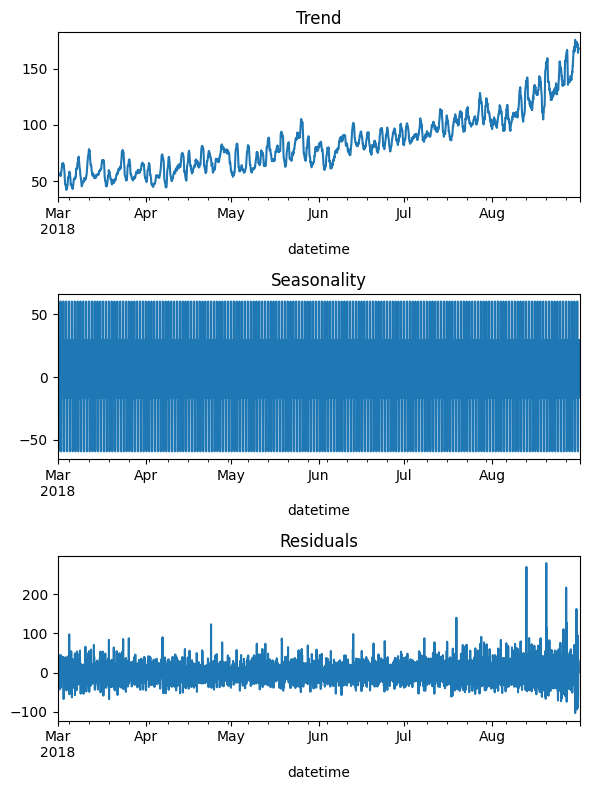

In [ ]:
# Desglosa el número de pedidos en Tendencia, Estacionalidad y Residuales
decomposed = seasonal_decompose(data['num_orders'])

#Gráfica el desglose
plt.figure(figsize=(6, 8))
plt.subplot(311)
# Para mostrar el gráfico de manera correcta, especifica su
# eje ax igual a plt.gca() (gca = obtener el eje actual)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

**Observaciones**

- Se observa una tendencia creciente en un periodo de 6 meses de Marzo a Agosto del año 2018.
- Los datos poseen una estacionalidad por hora que oscila entre 10 y -10 pedidos de taxis.
- Respecto a los datos residuales no se logra apreciar algún patrón.
- Debido a que tanto la distribución como la media cambian el proceso estocástico es **no estacionario.**

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - El análisis de tendencia, estacionalidad y residuales está bien estructurado, con observaciones claras que facilitan comprender el comportamiento temporal de los pedidos.
</div>


## Formación

In [ ]:
# Divide el Dataset para entrenamiento y prueba
# La división se hace en forma cronológica
train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

print(train.shape)
print(test.shape)

(3974, 7)
(442, 7)


In [ ]:
# Divide caracteristicas y objetivo
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - Correcta división cronológica de los datos y separación clara entre características y variable objetivo, preparando de forma ordenada el conjunto para el modelado.
</div>


## Prueba

In [ ]:
# Define la función RECM
def recm(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
# Lista vacía para almacenar los resultados
results = []

In [ ]:
# Módelo de Regresión Lineal
intercepts = ['True', 'False']

for intercept in intercepts:
    lr_model = LinearRegression(fit_intercept=intercept)

    start = time.time()
    lr_model.fit(features_train, target_train)
    train_time = time.time() - start

    pred_lr = lr_model.predict(features_test)
    results.append(['LinearRegression', recm(target_test, pred_lr), train_time])

In [ ]:
# Módelo Árbol de decisión
min_samples_split = [25, 30, 35]
max_depth = [10, 15, 20]

for split in min_samples_split:
    for depth in max_depth:
        dt_model = DecisionTreeRegressor(max_depth= depth, min_samples_split= split, random_state=12345)

        start = time.time()
        dt_model.fit(features_train, target_train)
        train_time = time.time() - start

        pred_dt = dt_model.predict(features_test)
        results.append(['DecisionTree', recm(target_test, pred_dt), train_time])

In [ ]:
# Módelo Bosque
n_estimators = [150, 200]
max_depth = [10, 15]

for estimators in n_estimators:
    for depth in max_depth:
        rf_model = RandomForestRegressor(n_estimators=estimators, max_depth=depth, random_state=12345, n_jobs=-1)

        start = time.time()
        rf_model.fit(features_train, target_train)
        train_time = time.time() - start

        pred_rf = rf_model.predict(features_test)
        results.append(['RandomForest', recm(target_test, pred_rf), train_time])

In [ ]:
# Módelo Catboost
learning_rate = [0.1, 0.2]
max_depth = [8, 10]
iterations = [100, 150]

for depth in max_depth:
    for rate in learning_rate:
        for iteration in iterations:
            cat_model = CatBoostRegressor(
                iterations=iteration,
                depth=depth,
                learning_rate=rate,
                loss_function='RMSE',
                random_seed=12345,
                verbose=False
            )

            start = time.time()
            cat_model.fit(features_train, target_train)
            train_time = time.time() - start

            pred_cat = cat_model.predict(features_test)
            results.append(['CatBoost', recm(target_test, pred_cat), train_time])

In [ ]:
# Módelo k-nearest Neighbors Regressor
n_neighbors = [3, 6]
weights = ['uniform', 'distance']

for neighbors in n_neighbors:
    for weight in weights:
        knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weight)

        start = time.time()
        dt_model.fit(features_train, target_train)
        train_time = time.time() - start

        pred_knn = dt_model.predict(features_test)
        results.append(['KNeighborsRegressor', recm(target_test, pred_knn), train_time])


In [ ]:
# Recopila los resultados
results_df = pd.DataFrame(results, columns=['Modelo', 'RECM', 'Tiempo Entrenamiento (s)'])
print(results_df)

                 Modelo       RECM  Tiempo Entrenamiento (s)
0      LinearRegression  54.228834                  0.003044
1      LinearRegression  54.228834                  0.002127
2          DecisionTree  49.262499                  0.008576
3          DecisionTree  48.748243                  0.008314
4          DecisionTree  48.835421                  0.008301
5          DecisionTree  49.473987                  0.007467
6          DecisionTree  48.652638                  0.008035
7          DecisionTree  48.739988                  0.007942
8          DecisionTree  49.895994                  0.007471
9          DecisionTree  49.124622                  0.007954
10         DecisionTree  49.211134                  0.007998
11         RandomForest  46.709802                  0.427020
12         RandomForest  45.493787                  0.534595
13         RandomForest  46.947654                  0.555332
14         RandomForest  45.818587                  0.727670
15             CatBoost 

**Conclusión**

- Los modelos que lograron minimizar el umbral objetivo de 48 RECM fueron RandomForest y CatBoost. Mientras que LinearRegression, DecisionTree y KNeighborsRegressor no lograron el objetivo.
- El módelo con la mejor métrica RECM fue RandomForest, cabe mencionar que también este modelo fue el que más tiempo tardó en su entrenamiento.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - Excelente fase de prueba, con evaluación exhaustiva de modelos y parámetros; la identificación clara de RandomForest como el más preciso demuestra un buen criterio analítico.
</div>


## Comentario general del revisor

# Comentario General del Revisor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, análisis exploratorio, y evaluación comparativa de modelos predictivos para series temporales.  

#### Puntos Positivos:

* **Procesamiento de datos:** Correcta preparación, limpieza, remuestreo por hora y creación de características temporales relevantes.
* **Visualización y análisis gráfico:** Buen desglose en tendencia, estacionalidad y residuales, con observaciones precisas.
* **Ingeniería de características:** Uso adecuado de desfases y medias móviles para enriquecer el modelado.
* **Comparación de modelos:** Pruebas completas con diversos algoritmos y parámetros, identificando de forma justificada el modelo más eficaz (RandomForest) cumpliendo el objetivo de RECM.

Has entregado un trabajo bien estructurado, con código limpio y resultados respaldados por un análisis sólido.


# Lista de revisión

- [x]
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48